In [1]:
import modin.pandas as mpd
import ray
import numpy as np

from matplotlib import style

In [2]:
ray.init()

2022-06-03 20:22:57,300	INFO services.py:1456 -- View the Ray dashboard at http://127.0.0.1:8265


RayContext(dashboard_url='127.0.0.1:8265', python_version='3.9.7', ray_version='1.12.1', ray_commit='4863e33856b54ccf8add5cbe75e41558850a1b75', address_info={'node_ip_address': '127.0.0.1', 'raylet_ip_address': '127.0.0.1', 'redis_address': None, 'object_store_address': 'tcp://127.0.0.1:62996', 'raylet_socket_name': 'tcp://127.0.0.1:62561', 'webui_url': '127.0.0.1:8265', 'session_dir': 'C:\\Users\\caisy\\AppData\\Local\\Temp\\ray\\session_2022-06-03_20-22-55_086033_77740', 'metrics_export_port': 61548, 'gcs_address': '127.0.0.1:61350', 'address': '127.0.0.1:61350', 'node_id': 'adabbcdb36a3e644b063fa96ae307ada92f595f2d069426be74ac566'})

In [33]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
style.use("seaborn")

In [4]:
df = mpd.read_csv("data-trimmed")

In [5]:
df.drop(columns= df.columns[0], axis = 1, inplace = True)

In [6]:
df

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
5595059,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
5595060,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
5595061,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


In [52]:
df.columns

Index(['Unnamed: 0', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [7]:
df.started_at = mpd.to_datetime(df.started_at)
df.ended_at = mpd.to_datetime(df.ended_at)

In [51]:
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------------------  ----------------  -----         
 0   Unnamed: 0          5595063 non-null  int64
 1   rideable_type       5595063 non-null  object
 2   started_at          5595063 non-null  datetime64[ns]
 3   ended_at            5595063 non-null  datetime64[ns]
 4   start_station_name  4904257 non-null  object
 5   start_station_id    4904257 non-null  object
 6   end_station_name    4855893 non-null  object
 7   end_station_id      4855893 non-null  object
 8   start_lat           5595063 non-null  float64
 9   start_lng           5595063 non-null  float64
 10  end_lat             5590292 non-null  float64
 11  end_lng             5590292 non-null  float64
 12  member_casual       5595063 non-null  object
dtypes: object(6), float64(4), datetime64[ns](2), int64(1)
memory usage: 554.9 MB


In [8]:
df["length"] = df.ended_at - df.started_at

In [57]:
df.loc[df.length > "1d", "length"].sort_values(ascending = False)

1839498   38 days 20:24:09
1789291   38 days 16:11:41
758503    37 days 10:41:36
1325528   36 days 14:21:23
2613756   34 days 02:27:09
                ...       
3017303    1 days 00:01:44
529202     1 days 00:01:39
3280311    1 days 00:01:36
2255379    1 days 00:00:47
116396     1 days 00:00:02
Name: length, Length: 4016, dtype: timedelta64[ns]

In [58]:
 df.started_at.dt.day_name()

0           Saturday
1          Wednesday
2           Thursday
3           Thursday
4           Saturday
             ...    
5595058       Sunday
5595059       Monday
5595060     Thursday
5595061       Monday
5595062       Monday
Name: started_at, Length: 5595063, dtype: object

In [9]:
df["weekday"] = df.started_at.dt.weekday

In [10]:
df["weekend"] = df.weekday.apply(lambda x: 1 if x > 4 else 0)

In [11]:
df.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'length', 'weekday',
       'weekend'],
      dtype='object')

In [61]:
df.member_casual.value_counts()

member    3066058
casual    2529005
Name: member_casual, dtype: int64

<AxesSubplot:>

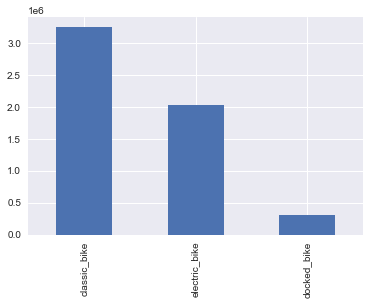

In [62]:
df.rideable_type.value_counts().plot(kind = "bar")

In [63]:
df.loc[df.length > "1d", ["length", "member_casual"]].groupby("member_casual").count()

,length
member_casual,
casual,3527
member,489


In [64]:
df.pivot_table(index = "member_casual", columns = "rideable_type", values = "weekday", aggfunc= "count")

Order of columns could be different from pandas.


rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,1266657,312342,950006
member,1984371,1,1081686


In [65]:
df.loc[(df.length > "2d") & (df.member_casual == "casual"), "rideable_type"].value_counts() 

docked_bike    773
Name: rideable_type, dtype: int64

In [18]:
df["usage_day_period"] = df.started_at.apply(lambda x: "morning" if x.hour >=5 and x.hour < 12
                   else("afternoon" if x.hour >= 12 and x.hour < 18 
                   else("night" if x.hour >= 18 and x.hour < 23 
                   else "midnight")))

In [26]:
df["usage_working_time"] = 0

In [27]:
df.loc[(df.weekend ==0) & (df.started_at.dt.hour >=9) & (df.started_at.dt.hour < 18), "usage_working_time"] = 1

In [28]:
df

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,length,weekday,weekend,usage_day_period,working_time,usage_working_time
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,0 days 00:10:25,5,1,afternoon,0,0
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,0 days 00:04:04,2,0,night,0,0
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,0 days 00:01:20,3,0,night,0,0
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,0 days 00:11:42,3,0,afternoon,1,1
4,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,0 days 00:00:43,5,1,midnight,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,0 days 00:19:13,6,1,afternoon,0,0
5595059,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,0 days 00:07:01,0,0,night,0,0
5595060,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,0 days 00:08:17,3,0,morning,0,0
5595061,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,0 days 00:14:13,0,0,morning,1,1


In [31]:
df.to_pickle("data-processed")